### Linear regression

***Linear regression*** models the relationship between a dependent variable (often denoted as $y$ and one or more independent variables (often denoted as $x$). It assumes a linear relationship between the independent variables and the dependent variable. The goal of linear regression is to find the best-fitting straight line that describes the relationship between the variables.

Mathematically, a ***simple linear regression*** model can be represented as:

$ y = \beta_0 + \beta_1 x + \varepsilon $

Where:
- $y$ is the dependent variable (the variable we want to predict).
- $x$ is the independent variable (the variable used to make predictions).
- $\beta_0$ is the y-intercept of the line.
- $\beta_1$ is the slope of the line (the change in $y$ for a one-unit change in $x$).
- $\varepsilon$ is the error term, representing the difference between the observed $y$ and the predicted $y$.

In ***multiple linear regression***, there can be more than one independent variable, and the equation becomes:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon$

The goal of linear regression is to estimate the values of the coefficients $\beta_0, \beta_1, \ldots, \beta_n$ that minimize the sum of squared differences between the observed and predicted values of $y$. This is typically done using the method of least squares.

The fitted line represents the best estimate of the relationship between the independent and dependent variables based on the given data.

<div>
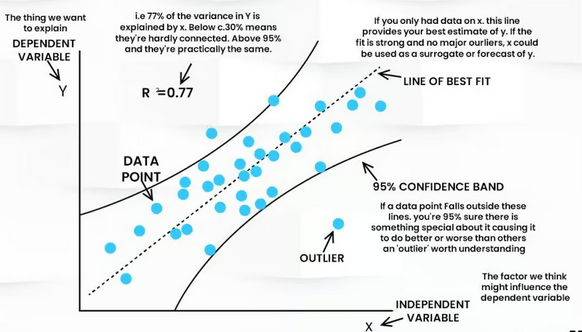
</div>

Linear regression ***key assumptions***:

1. **Linearity**: The relationship between the dependent variable and the independent variable(s) is linear. This means that changes in the independent variable(s) result in proportional changes in the dependent variable.

2. **Independence**: The observations or data points used in the regression analysis are independent of each other. In other words, the value of one observation does not depend on the value of another observation.

4. **Normality of Residuals**: The residuals (the differences between the observed and predicted values) are normally distributed. This assumption is important for hypothesis testing and constructing confidence intervals.

3. **Homoscedasticity**: Also known as constant variance, it means that the variance of the errors (residuals) is constant across all levels of the independent variable(s). This assumption implies that the spread of the residuals around the regression line remains roughly constant as the values of the independent variable(s) change.

7. **No Outliers**: Outliers affect the estimates of coefficients and the overall fit of the model. It's important to detect and address such points appropriately.

Violations of these assumptions can lead to biased estimates, incorrect standard errors, and unreliable inferences. Therefore, it's crucial to assess these assumptions when performing linear regression analysis and take appropriate steps if any of the assumptions are violated.

Linear regression ***confidence intervals***

The 95% confidence interval bands around the fitted line indicate the range within which we are 95% confident that the true regression line lies. Real datasets often violate the assumptions underlying the regression model (non-linearity, non-constant variance of the residuals, intercation effects, outliers ...). As a consequence  the confidence bands are not parallel to the fitted line.

### Univariate Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../../data/regression/salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


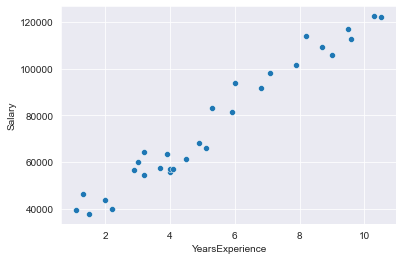

In [3]:
sns.scatterplot(data = df, x = "YearsExperience", y = "Salary");

#### train/test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
Xtrain, Xtest = train_test_split(df, test_size = 0.2, random_state = 385)
Xtrain.shape, Xtest.shape

((24, 2), (6, 2))

#### instantiate linear regression model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
# independent/dependent variables (train)
X = Xtrain.YearsExperience.values.reshape(-1, 1)
Y = Xtrain.Salary.values.reshape(-1, 1)

In [9]:
lr.fit(X, Y)

LinearRegression()

#### fitted model

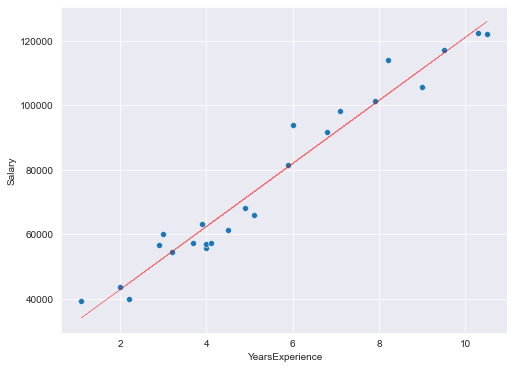

In [10]:
_, axs = plt.subplots(1, 1, figsize = (8, 6))
sns.scatterplot(ax = axs, data = Xtrain, x = 'YearsExperience', y = 'Salary')
axs.plot(Xtrain.YearsExperience.values, lr.predict(X), 'r', linewidth = 0.5, alpha = 0.5);

#### predict test

In [11]:
Xtest['predict'] = lr.predict(Xtest.YearsExperience.values.reshape(-1, 1))
Xtest

,YearsExperience,Salary,predict
2,1.5,37731.0,37882.876899
1,1.3,46205.0,35926.872732
8,3.2,64445.0,54508.912320
24,8.7,109431.0,108299.026919
27,9.6,112635.0,117101.045671
17,5.3,83088.0,75046.956076


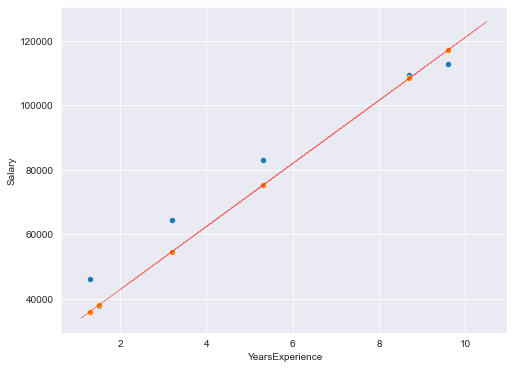

In [12]:
_, axs = plt.subplots(1, 1, figsize = (8, 6))
sns.scatterplot(ax = axs, data = Xtest, x = 'YearsExperience', y = 'Salary')
sns.scatterplot(ax = axs, data = Xtest, x = 'YearsExperience', y = 'predict')
axs.plot(Xtrain.YearsExperience.values, lr.predict(X), 'r', linewidth = 0.5, alpha = 0.5);

#### evaluate model

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

##### mean squared error

$mse = \sum_{i\in Xtest}^n \frac{\left(y_i - \hat{y}_i\right)^2}{n}$

In [14]:
sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /Xtest.shape[0]

48379019.91375699

In [15]:
mse = mean_squared_error(Xtest.Salary, Xtest.predict, squared = True)
print("MSE: %.4f" % mse)

MSE: 48379019.9138


##### root mean squared error

- express the error in units of the predicted variable

$rmse = \sqrt{mse}$

In [16]:
np.sqrt(sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /Xtest.shape[0])

6955.502851250727

In [17]:
rmse = mean_squared_error(Xtest.Salary, Xtest.predict, squared = False)
print("RMSE: %.4f" % rmse)

RMSE: 6955.5029


##### R-squared
$R^2 = 1 - \sum_{i\in Xtest}^n \frac{\left(y_i - \hat{y}_i\right)^2}{\left(y_i - \bar{y}_i\right)^2}$

In [18]:
1 -sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /sum([(y -Xtest.Salary.mean())**2 for y in Xtest.Salary])

0.9418842526313295

In [19]:
rsq = r2_score(Xtest.Salary, Xtest.predict)
print('R-quadrat: %.5f' % rsq)

R-quadrat: 0.94188


#### model summary

In [20]:
# Coeficient
print('Coeficient \u03B21: %.5f' % lr.coef_)
# Intercept (x = 0)
print('Terme independent \u03B20: %.5f' % lr.intercept_)
# error
X_ = Xtest.YearsExperience.values.reshape(-1, 1)
Y_ = Xtest.Salary.values.reshape(-1, 1)
print("Coeficient de determinació R^2:", lr.score(X_, Y_))

Coeficient β1: 9780.02084
Terme independent β0: 23212.84565
Coeficient de determinació R^2: 0.9418842526313295


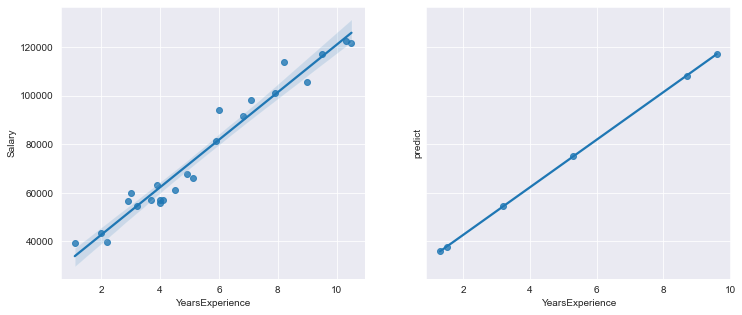

In [21]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.regplot(ax = axs[0], data = Xtrain, x = 'YearsExperience', y = 'Salary')
sns.regplot(ax = axs[1], data = Xtest, x = 'YearsExperience', y = 'predict');